<a href="https://colab.research.google.com/github/Khalil-Salama/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:(Prediction of Product Sales)

- Auther: Khalil Salama

## Project Overview

- This project is sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

Dictionary feature definitions

Variable Name Description

Item_Identifier: Product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low-fat or regular

Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of area in which the store is located

Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the target variable to be predicted.

## Load and Inspect Data

*Mount Google drive*

In [201]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Import required packges*

In [202]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_pred=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/01-Fundamentals/Week03/Data/sales_predictions_2023.csv')
sales_pred

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


*Display summery information*

In [203]:
# The first five rows
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [204]:
# General information
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


    After reviewing the information there is no obvoius changes, moving forword to checking and cleaning data


## Cleaning Data

*Number of rows*
- 8523

*Number of columns*
- 12

 *Data types for each variable*

In [205]:
sales_pred.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


**Duplicates**

*Finding duplicates*

In [206]:
# finding duplicates
sales_pred_duplicates=sales_pred.duplicated()
sales_pred_duplicates.sum()

np.int64(0)

    No duplicates where found, moving to check unique values

*Finding missing Values*

In [207]:
# Misssing values
null_sums=sales_pred.isna().sum()
null_columns= null_sums[null_sums>0]
null_columns

,0
Item_Weight,1463
Outlet_Size,2410


In [208]:
# Null sums percantge
null_sums_percentage=null_sums/len(sales_pred)
null_sums_percentage[null_sums_percentage>0]

,0
Item_Weight,0.171653
Outlet_Size,0.282764


<Axes: >

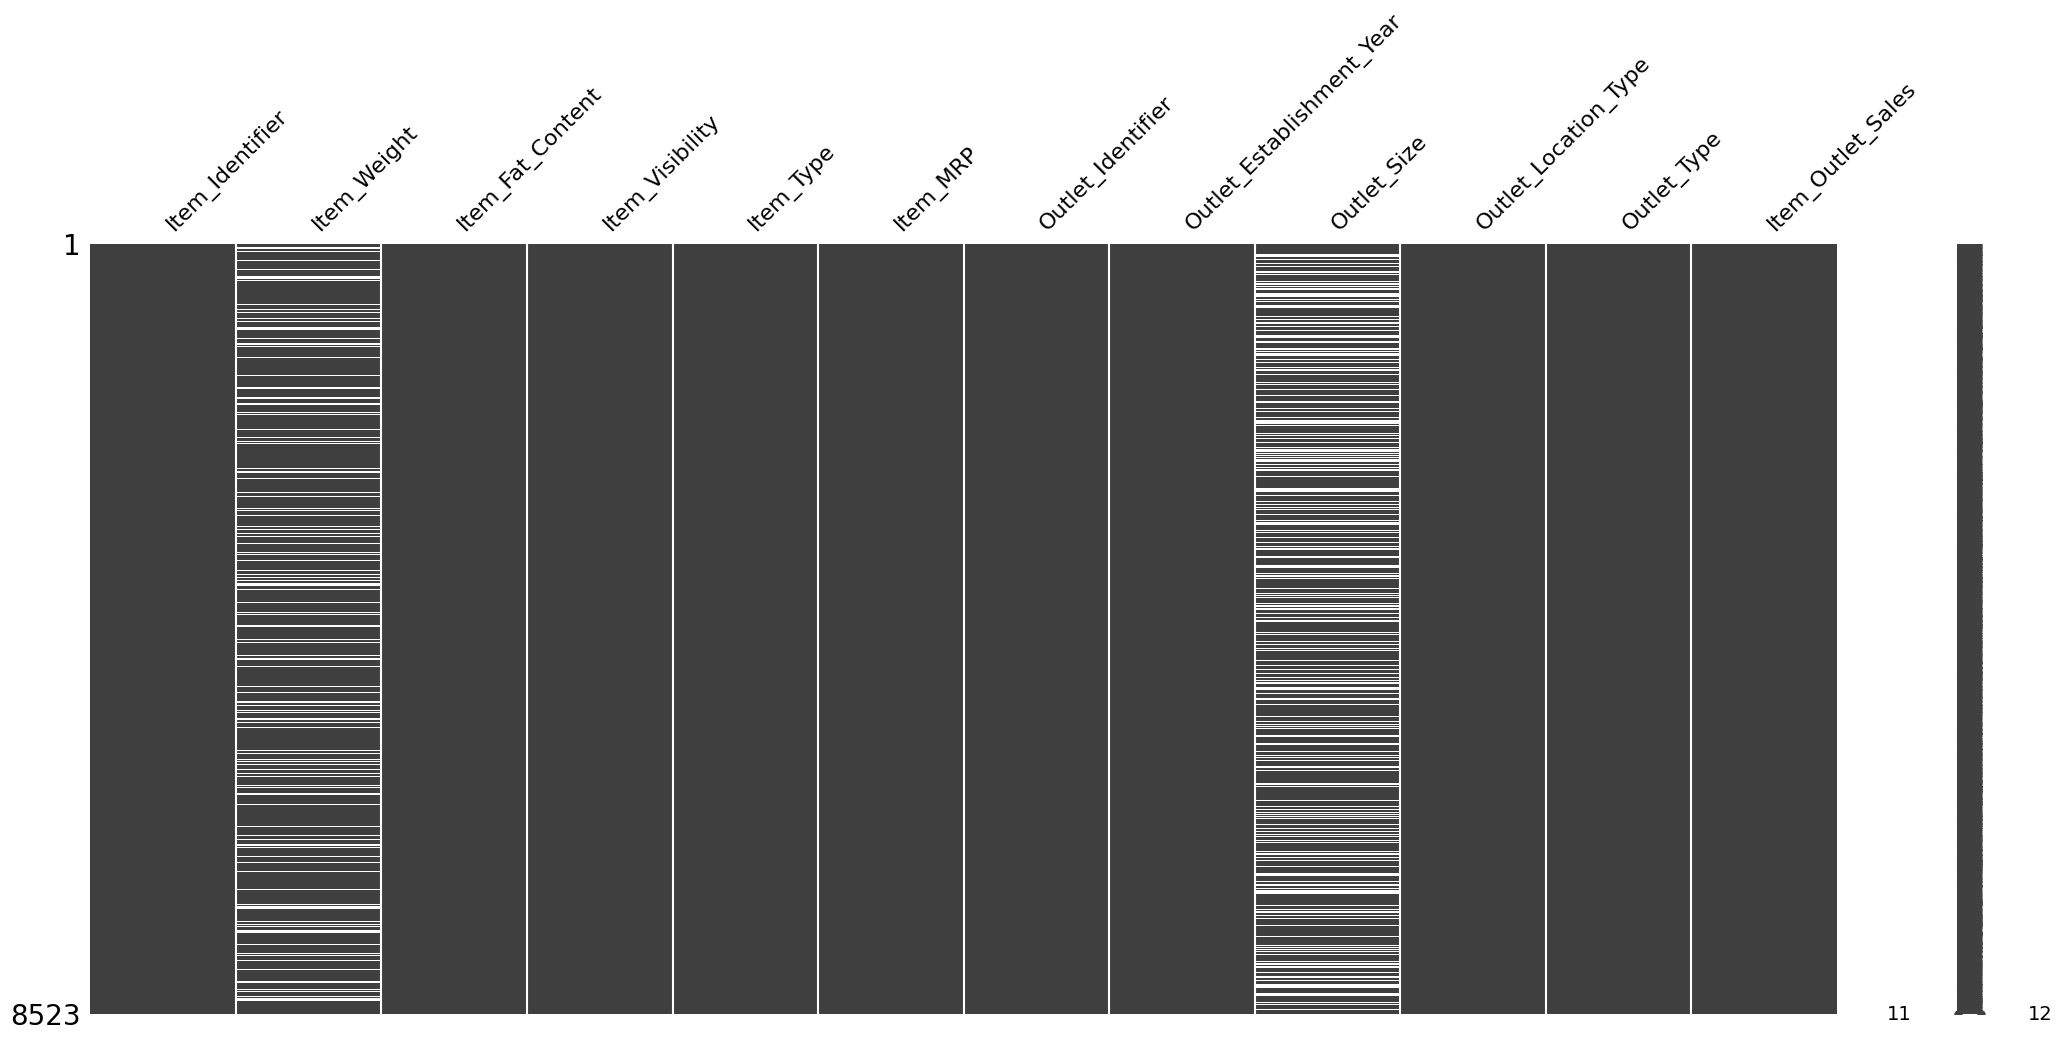

In [209]:
# Checking nulls with missingo
import missingno as msno
msno.matrix(sales_pred)

 *Adressing missing floats*


In [210]:
# Knowing the type of columns
sales_pred[null_columns.index].dtypes

,0
Item_Weight,float64
Outlet_Size,object


In [211]:
# adressing the nulls in Float
null_item_weight= sales_pred['Item_Weight'].isna()
null_item_weight.sum()

np.int64(1463)

In [212]:
# group by Item weight to check outlet sales change
sales_pred.groupby(['Item_Weight'])['Item_Outlet_Sales'].mean()

,Item_Outlet_Sales
Item_Weight,
4.555,1761.706800
4.590,1267.683200
4.610,1993.595429
4.615,4078.025000
4.635,2184.489800
...,...
21.000,1194.778100
21.100,1851.472306
21.200,2763.735800


    After looking at with Outlet Sales and since Item weight dosen't effect the value of outlet sales item. Decided to replace it with the mean figure -1


In [213]:
# replacing the null in item weight with -1
sales_pred['Item_Weight']=sales_pred['Item_Weight'].fillna(-1)
# confirming no nulls any more
sales_pred['Item_Weight'].isna().sum()

np.int64(0)

*Adressing missing strings*

In [214]:
# Checking the type of columns
sales_pred[null_columns.index].dtypes

,0
Item_Weight,float64
Outlet_Size,object


In [215]:
# grouping outlet sales by oulet size
sales_pred.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


In [216]:
sales_pred['Outlet_Size'].mode()

,Outlet_Size
0,Medium


    After looking at the Outlet Size values decided to replace the nulls with missing

In [217]:
# replacing null in Outlet size with Meduim
sales_pred['Outlet_Size']=sales_pred['Outlet_Size'].fillna('missing')
# confirming no nulls any more
sales_pred['Outlet_Size'].isna().sum()

np.int64(0)

*Finding and fixing any inconsistent categories of data.*


In [218]:
# filtering the string columns
all_string_columns=sales_pred.select_dtypes(include='object').columns
string_columns=[col for col in all_string_columns if col not in ['Item_Identifier','Outlet_Identifier']]
string_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [219]:
# making a for loop fpor the string columns
for col in string_columns:
  print(f"{col}:")
  print(sales_pred[col].value_counts(dropna=False))
  print("\n")

Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Size:
Outlet_Size
Medium     2793
missing    2410
Small      2388
High        932
Name: count, dtype: int64


Outlet_Location_Type:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Outlet_Type:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3 

    Found inconsistancy in column Item_Fat_Contant

In [220]:
# fixing the inconsistancy in Item fat contant
sales_pred['Item_Fat_Content']=sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

*Obtaining the summary statistics (min, max, mean) for each numerical column.*

In [221]:
# filtering the numeric columns
all_num_cols=sales_pred.select_dtypes(include='number').columns
all_num_cols
# removing outlet establishment year and item outlet sales from all num cols
num_cols=[col for col in all_num_cols if col not in ['Outlet_Establishment_Year','Item_Outlet_Sales']]
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [222]:
# Making a for loop for all numeric columns to get thier min, max, and mean
for col in num_cols:
  print(f"{col}:")
  print(f"min: {sales_pred[col].min()}")
  print(f"max: {sales_pred[col].max()}")
  print(f"mean: {sales_pred[col].mean()}")
  print("\n")

Item_Weight:
min: -1.0
max: 21.35
mean: 10.478936407368296


Item_Visibility:
min: 0.0
max: 0.328390948
mean: 0.06613202877895108


Item_MRP:
min: 31.29
max: 266.8884
mean: 140.9927819781767




#Visualization the data set

**1) Histograms to view the distributions of numerical features in your dataset.**


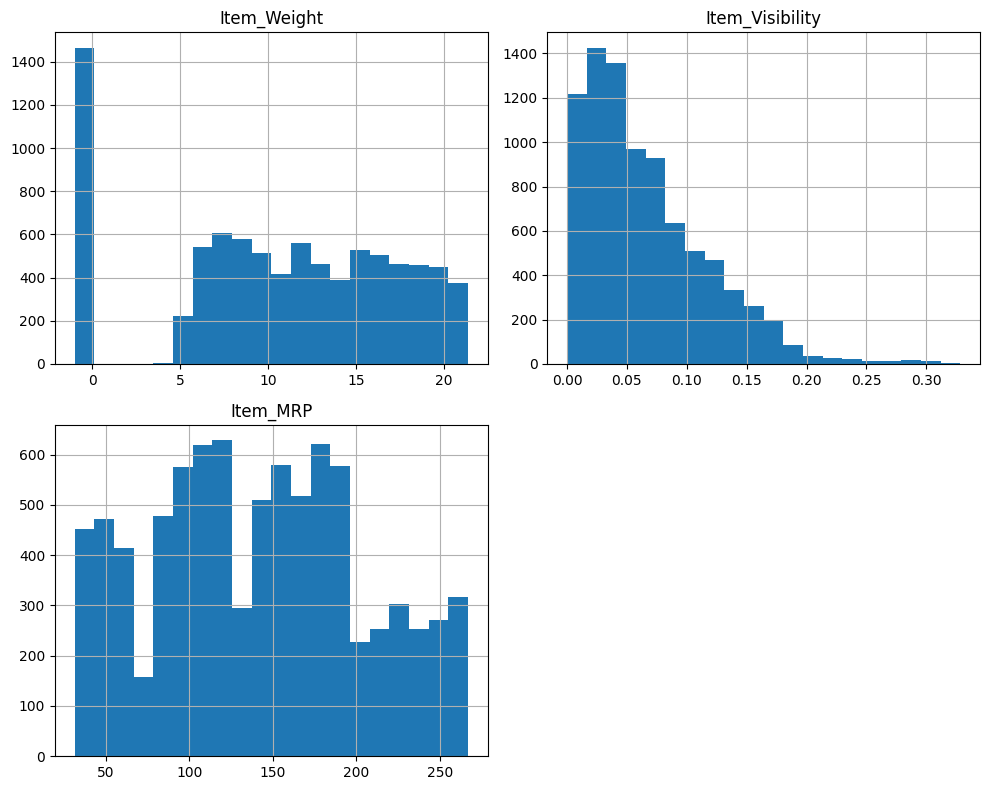

In [223]:
# Create a list of numeric columns with data
plottable_cols = [col for col in num_cols if pd.api.types.is_numeric_dtype(sales_pred[col]) and sales_pred[col].notna().any()]

# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(plottable_cols) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4)) # Adjust figure size based on number of rows

# Flatten the axes array for easy iteration if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    # If there's only one row, axes is not a 2D array, so handle it differently
    if n_cols > 1:
        axes = axes
    else:
        # If there's only one plot, axes is just a single axis object
        axes = [axes]


# Plot histograms for the plottable columns
for i, col in enumerate(plottable_cols):
    ax = axes[i]
    sales_pred[col].hist(bins=20, ax=ax)
    ax.set_title(col)

# If there are fewer plots than total axes, turn off the remaining axes
if len(plottable_cols) < len(axes):
    for i in range(len(plottable_cols), len(axes)):
        axes[i].axis('off')


fig.tight_layout()
plt.show()


*We notice that the fastest moving items are:*
- Items weight below 0
- Items with visiblity below 0.05
- Items with MRP between 90, 130 and between 140, 195

**2) Boxplots to view statistical summaries of numerical features in your dataset.**

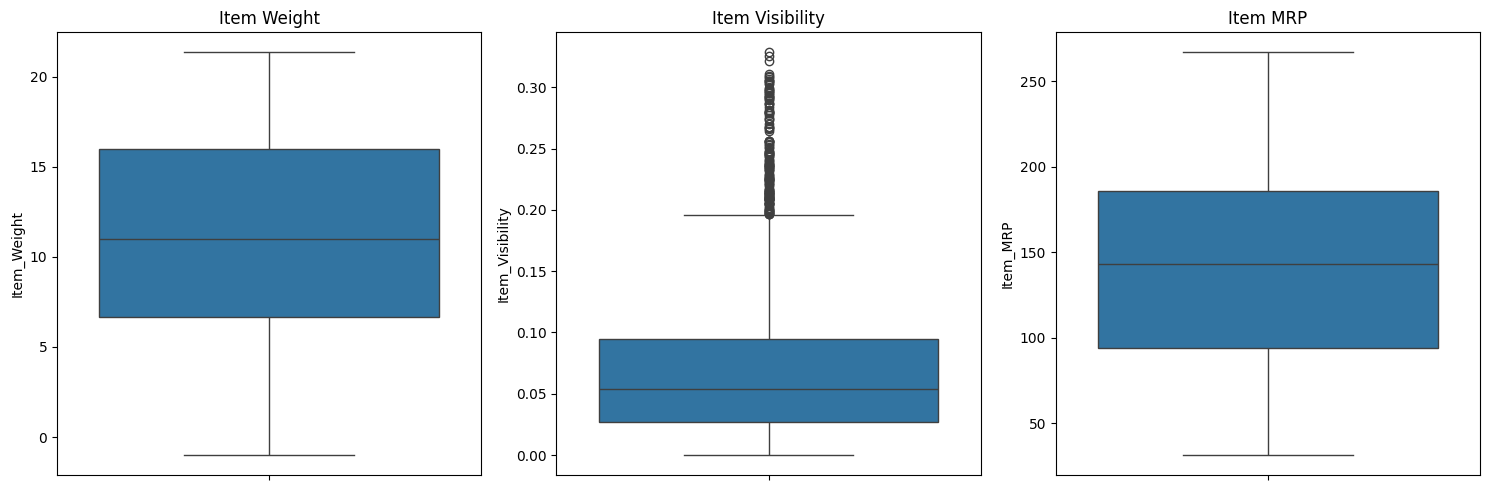

In [224]:
# creating a boxplot for items weight, items visiblity and MRP
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot boxplot for Item_Weight on the first axis
sns.boxplot(y=sales_pred['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')
# Plot boxplot for Item_Visibility on the second axis
sns.boxplot(y=sales_pred['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')
# Plot boxplot for Item_MRP on the third axis
sns.boxplot(y=sales_pred['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')
fig.tight_layout()
plt.show()

*we notice the following*
- The item weight and MRP are normally distributed nothing odd
- The item visibilty needs more analysis because most of the items have low visibilty and there are many outliers (very high visibility)

**3) Countplots to view the frequency of each class of categorial features in your dataset.**

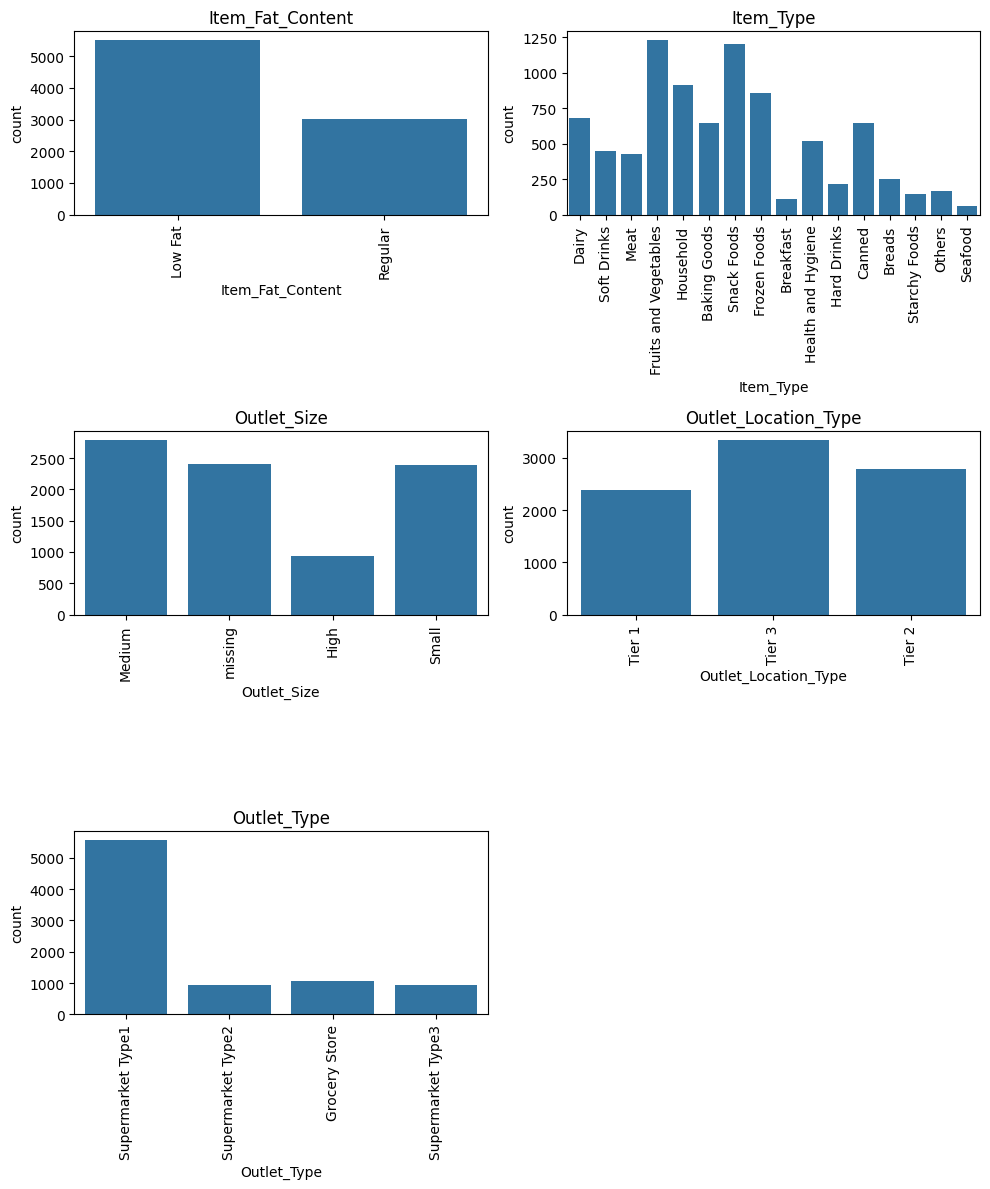

In [225]:
# creat countplots for categorial features for cat_cols
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))

# Flatten the axes array for easy iteration if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    # If there's only one row, axes is not a 2D array, so handle it differently
    if n_cols > 1:
        axes = axes
    else:
        # If there's only one plot, axes is just a single axis object
        axes = [axes]

# Plot countplots for the categorical columns
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=sales_pred, x=col, ax=ax) # Using x for vertical bars
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90); # Rotate x-axis labels

# If there are fewer plots than total axes, turn off the remaining axes
if len(categorical_cols) < len(axes):
    for i in range(len(categorical_cols), len(axes)):
        axes[i].axis('off')

fig.tight_layout()
plt.show();

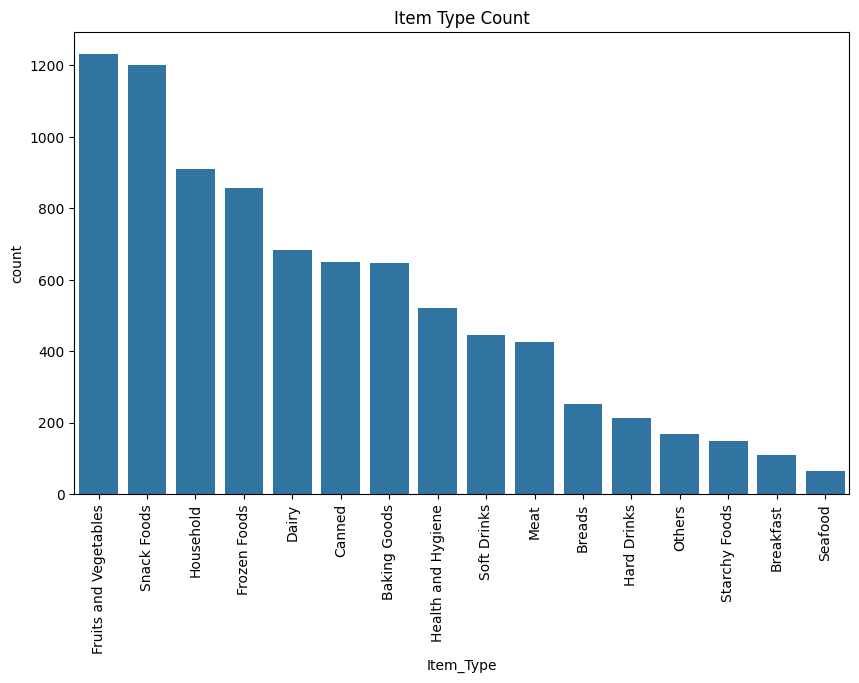

In [226]:
# recalling a countplot for Item type only with sorting
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_pred, x='Item_Type', order=sales_pred['Item_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Item Type Count')
plt.show()
plt;

*We notice that:*
- Low fat items are double the volume of regular fat
- The data covers small and meduim outlets much more than high outlets
- The data covers supermarket type 1 more than the rest types

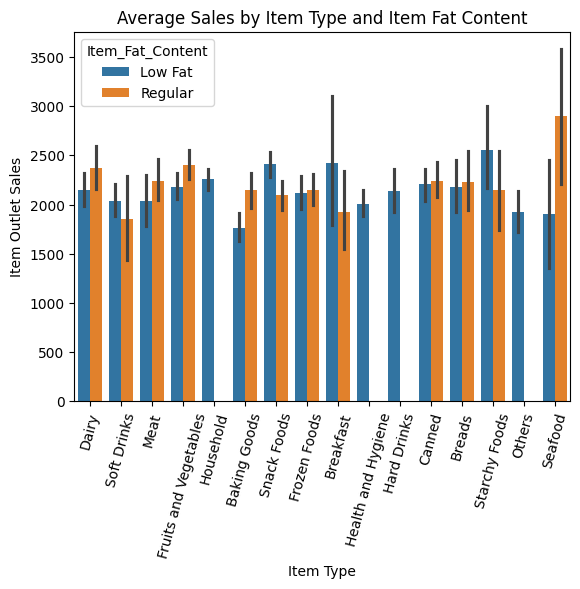

In [227]:
sns.barplot(data=sales_pred, x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content')
plt.title('Average Sales by Item Type and Item Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=75)
plt.show()

*We can tellfrom the categorial columns analysis that*
- Each Item type vary a little between Food with low fat and reguler fat but nothning significant except with seafood.

**4) Heatmap to view the correlation between features.**

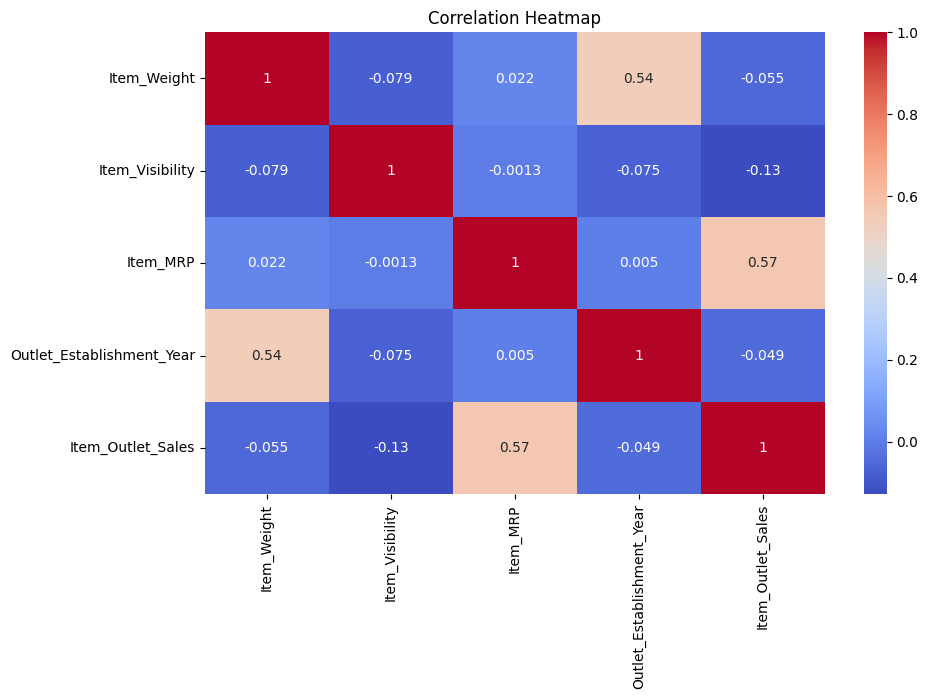

In [228]:
# creating a heat map with annots
all_num_cols=sales_pred.select_dtypes(include='number').columns
all_num_cols
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pred[all_num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 - we can notice that there is a moderate corrlelation betweem MRP and Item oulet sales.

*There is no strong relation between them and Item outlet sales*

# Removing place holders and replacing them with null values


In [229]:
sales_pred['Item_Weight'].value_counts()

,count
Item_Weight,
-1.000,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


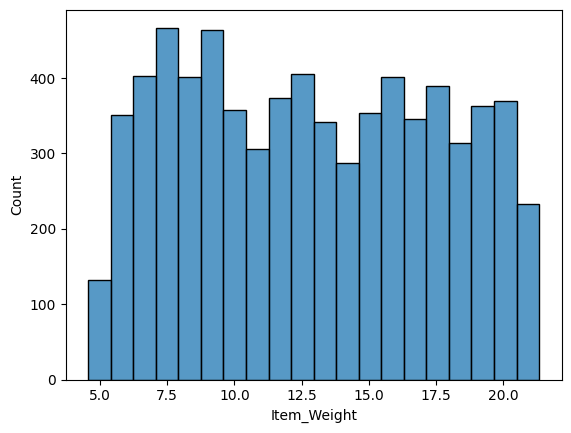

In [230]:
# Replacing -1 with nan
sales_pred['Item_Weight']=sales_pred['Item_Weight'].replace(-1,np.nan)
sales_pred['Item_Weight'].value_counts()
sns.histplot(sales_pred['Item_Weight']);

In [231]:
# Replacing missing with null value in Outlet_size
sales_pred['Outlet_Size']=sales_pred['Outlet_Size'].replace('missing',np.nan)
sales_pred['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


## Exploratory Data Analysis

1) Create a univariate visualization showing the distribution of values/categories.

In [232]:
temp_df=sales_pred.copy()

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(sales_pred, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = sales_pred.copy() # Use the passed-in dataframe 'df'
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Get the bars from the plot
  bars = ax.patches

  # Assign a unique color to each bar
  for i, bar in enumerate(bars):
      bar.set_color(plt.cm.viridis(i / len(bars))) # Using a colormap for different colors

  # Get current tick locations and labels
  current_ticks = ax.get_xticks()
  current_labels = ax.get_xticklabels()
  # Set new tick labels with rotation
  ax.set_xticks(current_ticks) # Set the ticks explicitly
  ax.set_xticklabels(current_labels, rotation=45, ha='right') # Then set the labels

  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

  # Test our function with the print statements
# explore_categorical(df, 'Alley');

In [234]:
# calling categorial columns
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

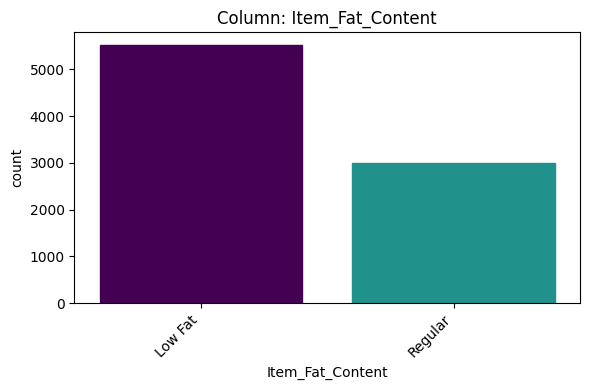

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [235]:
explore_categorical(temp_df, 'Item_Fat_Content');

What type of feature is it?

Categorial

How many null values? What percentage?

No null Values

Is the feature constant or quasi-constant?

No


What is the cardinality? Is it high (>10)?

NO


Would we know this feature before the target is determined?

Yes


Is there a business case/understanding reason to exclude based on our business case?

No, the retailer should have both products at his outlet

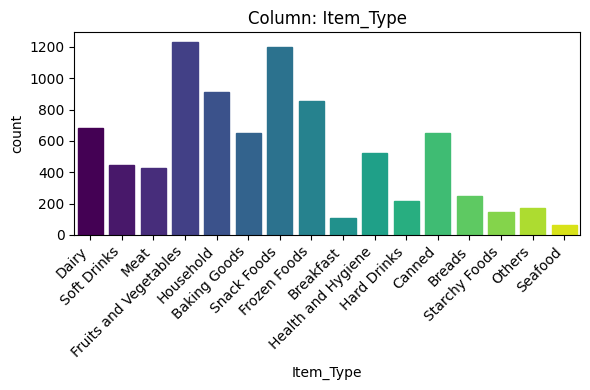

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [236]:
explore_categorical(temp_df, 'Item_Type');

What type of feature is it?

Categorial

How many null values? What percentage?

No null Values

Is the feature constant or quasi-constant?

No


What is the cardinality? Is it high (>10)?

Yes


Would we know this feature before the target is determined?

Yes


Is there a business case/understanding reason to exclude based on our business case?

Yes, the retailer can determain which products he should have the most

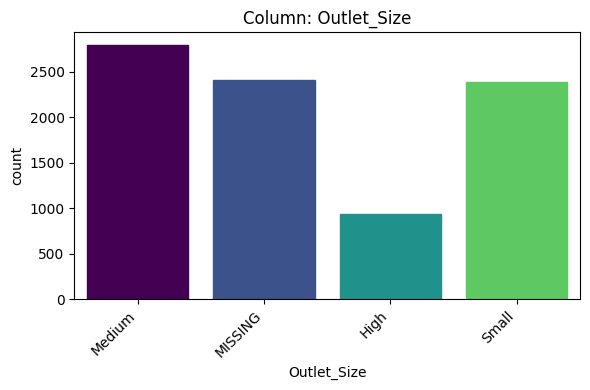

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [237]:
explore_categorical(temp_df, 'Outlet_Size');

What type of feature is it?

Categorial

How many null values? What percentage?

2410 nuls, percentge 28.28%

Is the feature constant or quasi-constant?

No


What is the cardinality? Is it high (>10)?

NO


Would we know this feature before the target is determined?

Yes


Is there a business case/understanding reason to exclude based on our business case?

Yes, the retailer can determain the size of the outlet

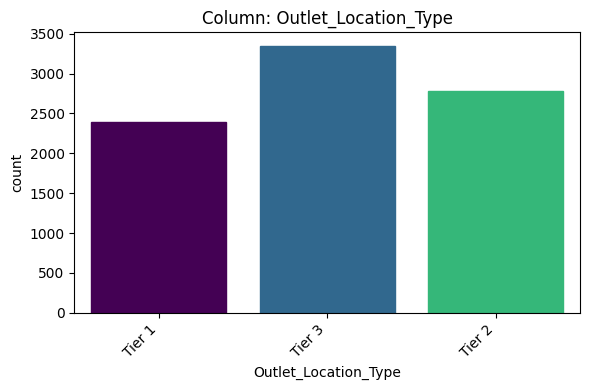

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [238]:
explore_categorical(temp_df, 'Outlet_Location_Type');

What type of feature is it?

Categorial

How many null values? What percentage?

No

Is the feature constant or quasi-constant?

No


What is the cardinality? Is it high (>10)?

NO


Would we know this feature before the target is determined?

Yes


Is there a business case/understanding reason to exclude based on our business case?

Yes, the retailer can determain the Tier

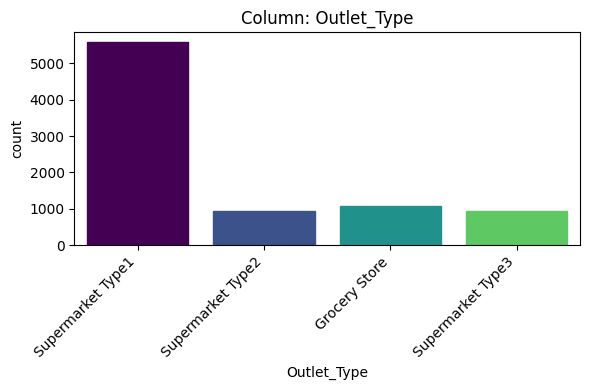

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [239]:
explore_categorical(temp_df, 'Outlet_Type');

What type of feature is it?

Categorial

How many null values? What percentage?

No

Is the feature constant or quasi-constant?

No


What is the cardinality? Is it high (>10)?

NO


Would we know this feature before the target is determined?

Yes


Is there a business case/understanding reason to exclude based on our business case?

Yes, the retailer can determain the supermarket type

2) Create a multivariate visualization plotting each feature vs. the target.

In [240]:
# Final version of function
def plot_categorical_vs_target(sales_pred, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = sales_pred.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

# fig, ax = plot_categorical_vs_target(df, x='Exter Qual', order=qual_order)

<ipython-input-240-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


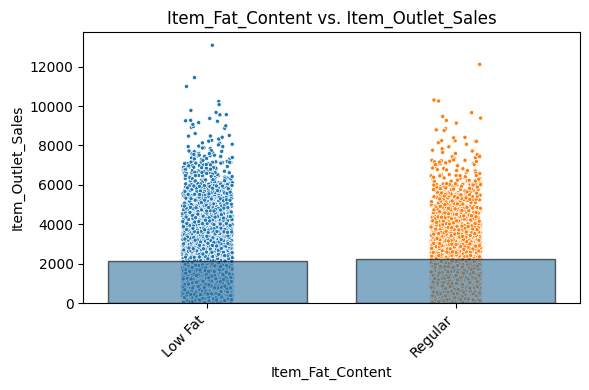

In [241]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Item_Fat_Content')

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I Expect it to be a predictor

- Does this feature appear to be a predictor of the target?

 - No it dosen't


<ipython-input-240-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


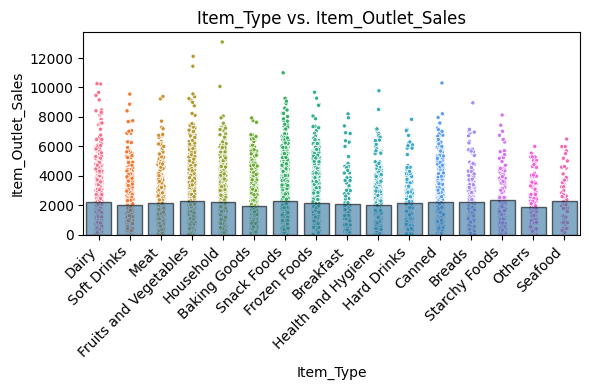

In [242]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Item_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect it to be a predictor

- Does this feature appear to be a predictor of the target?

 - No it does not

<ipython-input-240-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


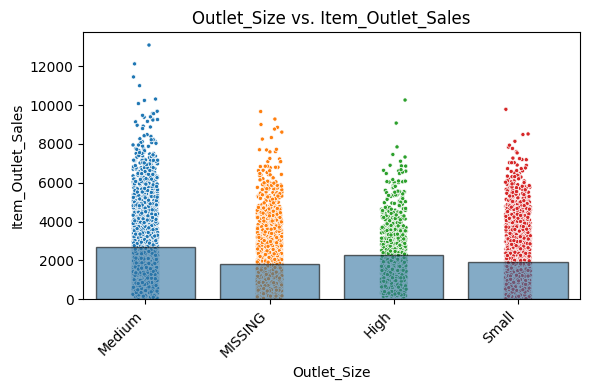

In [243]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Size')

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I do expect it to ba a predictor

- Does this feature appear to be a predictor of the target?

 - No it does not

<ipython-input-240-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


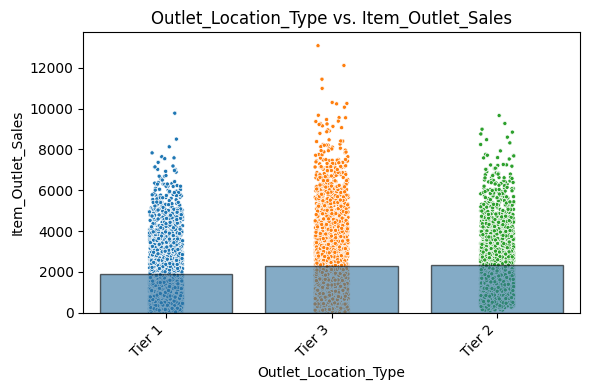

In [244]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Location_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - No It does not

<ipython-input-240-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


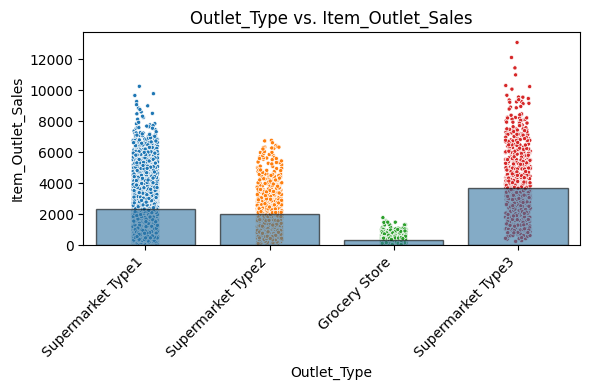

In [245]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - Yes it apears that it is a predictor

In [246]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(sales_pred, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = sales_pred[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  # Change 'lw' to 'linewidths' in the scatter_kws dictionary
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=sales_pred, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax
  # Test the function with two kwargs from the regplot function

#fig, ax = plot_numeric_vs_target(df, "Living Area Sqft", color = 'red', truncate = False)

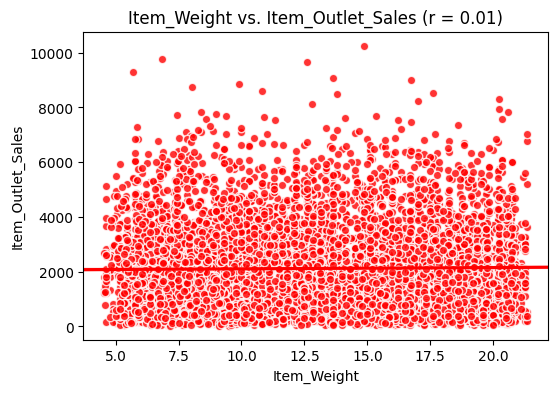

In [247]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_Weight", color = 'red', truncate = False)

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - No it does not

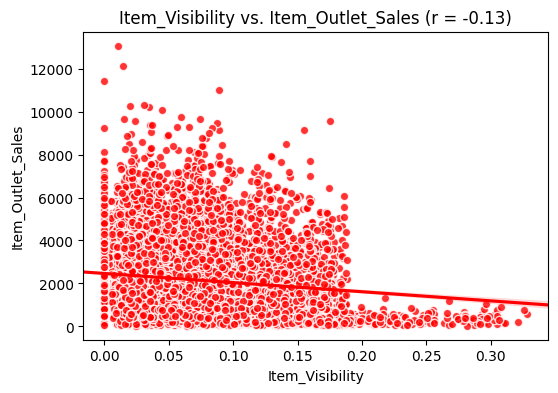

In [248]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_Visibility", color = 'red', truncate = False)

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - Yes it maybe a predictor

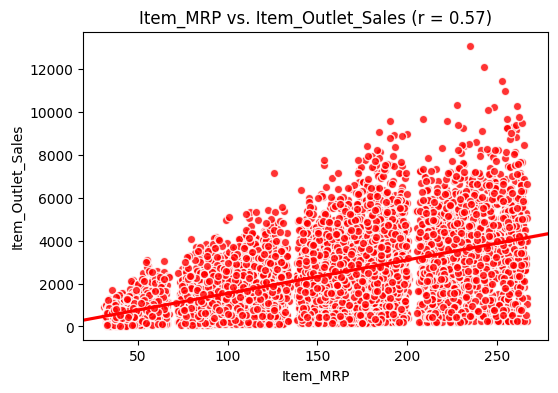

In [249]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_MRP", color = 'red', truncate = False)

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - Yes it surely apears that it is a predictor

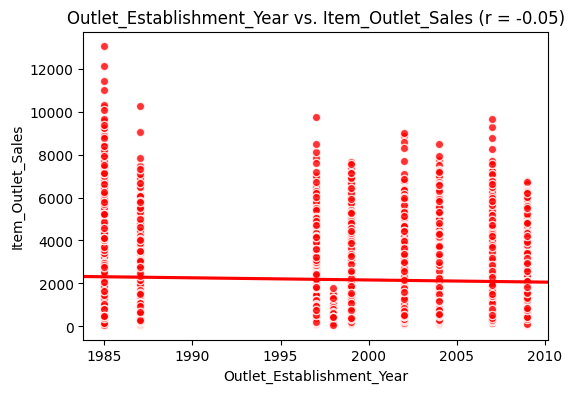

In [250]:
fig, ax = plot_numeric_vs_target(sales_pred, "Outlet_Establishment_Year", color = 'red', truncate = False)

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 - Yes I expect that

- Does this feature appear to be a predictor of the target?

 - No it does not appear that it is a predictor

# Using machine learning to forecast future sales

In [251]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [252]:
# Loading the data set
fpath= '/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/02-IntroML/Week05/Data/sales_predictions_2023 (1).csv'
df=pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [253]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


 - Checking and dropping duplicates if any


In [254]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

*No duplicates found*

- checking inconsistancies in catigorial columns

In [255]:
# Filter categorial columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [256]:
# loop to check the value counts in cat cols
for col in cat_cols:
  print(col)
  print(df[col].value_counts())
  print('\n')


Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT0

In [257]:
# fixing inconcistancies in Item_Fat_content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
# checking Item Fat_content
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


- Checking incosistancies in numerical columns


In [258]:
# Filter for numerical columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [259]:
# loop for numerical columns
for col in num_cols:
  print(col)
  print(df[col].describe())
  print('\n')

Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Item_Outlet_Sales
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000


*there are no inconsistancies in numerical columns*

- Preparing for modeling

In [260]:
# droping the Item_Identifier from the df
df= df.drop(columns='Item_Identifier')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [261]:

### 1) Defining y and X and runing X_train, X_test

#y= df['Best Position']
#X = df.loc[ :, "Pace Total":"Goalkeeper Reflexes"]

###Display Max columns

#pd.set_option('display.max_columns',100)
#X.head()

###runing the X_train, X_test

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Display X_train, Y_train

#display(X_train.head(3), y_train.head(3))

###Knownig the type of y_train

#print(y_train.dtype)

### 2) Visualizing the diffrence between x_train and x_test(physicality total)

#fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#sns.histplot(X_train["Physicality Total"], ax=ax[0])
#sns.histplot(X_test["Physicality Total"], ax=ax[1])
#ax[0].set_title("Physicality Total train")
#ax[1].set_title("Physicality Total test")
# share the same count axis
#ax[1].sharey(ax[0])
#plt.show()

### Visulaizing with using KDEplot
#sns.kdeplot(X_train["Physicality Total"], label='Train')
#sns.kdeplot(X_test["Physicality Total"], label='Train')

###Instantiate the imputer object from the SimpleImputer class with strategy 'median'
#impute_median = SimpleImputer(strategy='median')

###checking the null values in physicality total
#print(X_train["Physicality Total"].isnull().sum())
#print(X_test["Physicality Total"].isnull().sum())

###fit and transform the mean to physicality total
#X_train["Physicality Total"] = imputer.fit_transform(X_train[["Physicality Total"]])
#X_test["Physicality Total"] = imputer.transform(X_test[["Physicality Total"]])

###checking the null values in physicality total
#print(X_train["Physicality Total"].isnull().sum())
#print(X_test["Physicality Total"].isnull().sum())





# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
###num_cols = X_train.select_dtypes("number").columns
###print("Numeric Columns:", num_cols)

# instantiate preprocessors
###impute_median = SimpleImputer(strategy='median')
###scaler = StandardScaler()
# Make a numeric preprocessing pipeline
###num_pipe = make_pipeline(impute_median, scaler)
##num_pipe
# Making a numeric tuple for ColumnTransformer
##num_tuple = ('numeric', num_pipe, num_cols)
##num_tuple

### WITHOUT A PIPLINE ###

### 1) Making a tuple for ColumnTransformer with a single transformer (no pipeline)
# impute_median = SimpleImputer(strategy='median')
### Create the tuple without adding a pipeline:
### (choose_a_name, pipeline_or_transformer, list_of_columns)
# num_impute_tuple = ('number-imputed', impute_median, num_cols)
# num_impute_tuple

### 2) Instantiate with verbose_feature_names_out=False
# col_transformer = ColumnTransformer([num_impute_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)

### For Ordinal Data ###
### creating a fillter for categorical columns
#cat_cols= df.dtypes[df.dtypes == 'object'].index
#cat_cols
### Checking which columns are ordinal
#for col in updated_cat_cols:
  #print(col)
  #print(df[col].value_counts((dropna=False))
  #print('\n')

### define a list of columns to encode as ordinal
# ord_cols = ['Exter Qual', 'Garage Qual', 'Exter Cond', 'Garage Cond']
# ord_cols
### Specifying the order of categories in quality/condition columns
#impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
### Making the OrdinalEncoder
### Specifying order of categories for our  Ordinal Qual/Cond Columms
# qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
### Making the list of order lists for OrdinalEncoder
# ordinal_category_orders = [qual_cond_order, qual_cond_order, qual_cond_order, qual_cond_order]
# ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
### Making a final scaler to scale category #'s
# scaler_ord = StandardScaler()
# Making an ord_pipe
###ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
##ord_pipe
### Making an ordinal_tuple for ColumnTransformer
# ord_tuple = ('ordinal', ord_pipe, ord_cols)
# ord_tuple


### FOR ONE-HOT-ENCODED DATA ###

###Save list of column names
# ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
#print("OneHotEncoder Columns:", ohe_cols)
### Instantiate the individual preprocessors
# impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
# ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
### Make pipeline with imputer and encoder
# ohe_pipe = make_pipeline(impute_na, ohe_encoder)
#ohe_pipe
### Making a ohe_tuple for ColumnTransformer
# ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# ohe_tuple


### Instantiate with verbose_feature_names_out=False
# col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],verbose_feature_names_out=False)

### If we want also to show all the columns (Include remainder = 'passthrough')
###col_transformer = ColumnTransformer([num_tuple, ohe_tuple], remainder='passthrough', verbose_feature_names_out=False)

### Fit on training data
#col_transformer.fit(X_train)

### Set pandas as the default output for sklearn BEFORE transforming(to show .head())###
# from sklearn import set_config
# set_config(transform_output='pandas')

### Transform the training data
# X_train_processed = col_transformer.transform(X_train)
### Transform the testing data
# X_test_processed = col_transformer.transform(X_test)
### View the processed training data
# X_train_processed.head()

In [262]:
### 1) Defining y and X and runing X_train, X_test
y= df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')
###Display Max columns
pd.set_option('display.max_columns',100)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [263]:
###runing the X_train, X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
###Display X_train, Y_train
display(X_train.head(3), y_train.head(3))

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.35,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.25,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.35,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1


,Item_Outlet_Sales
4776,515.3292
7510,3056.0220
5828,1577.9460


In [264]:
### Checking which columns are ordinal
### creating a fillter for categorical columns
cat_cols_train= df.dtypes[df.dtypes == 'object'].index
cat_cols_train
### Checking which columns are ordinal
for col in cat_cols_train:
  print(col)
  print(df[col].value_counts(dropna=False))
  print('\n')

Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Outlet_Size
Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64


Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 

- Processing the ordinal columns

In [265]:
### define a list of columns to encode as ordinal
ord_cols = ['Outlet_Size','Outlet_Location_Type']
ord_cols
### Specifying the order of categories in quality/condition columns
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
### Making the OrdinalEncoder
### Specifying order of categories for our  Ordinal outlet/location Columms
Outlet_order = ['NA','Small', 'Medium', 'High']
Loc_order = ['Tier 1', 'Tier 2', 'Tier 3']
### Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Outlet_order, Loc_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
### Making a final scaler to scale
scaler_ord = StandardScaler()
###Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe
### Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

- Processing the categorial columns

In [266]:
###Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
### Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
### Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe
### Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

- Processing the numerical columns

In [267]:
#PREPROCESSING PIPELINE FOR NUMERIC DATA
#Save list of column names
num_cols_train = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols_train)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [268]:
#instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
#Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe
#Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols_train)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [269]:
### Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)


In [270]:
### Fit on training data
col_transformer.fit(X_train)


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [271]:
### Set pandas as the default output for sklearn BEFORE transforming(to show .head())###
from sklearn import set_config
set_config(transform_output='pandas')

In [274]:
### Transform the training data
X_train_processed = col_transformer.transform(X_train)
### Transform the testing data
X_test_processed = col_transformer.transform(X_test)
### View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
